# 0.データの確認

In [1]:
!ls

eda.ipynb src


In [2]:
!ls src

sample_submission.csv test.csv              train.csv


## 0.1.モジュールのインストール

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [73]:
sample_sub_df = pd.read_csv('src/sample_submission.csv', index_col = 0)
test_df = pd.read_csv('src/test.csv', index_col = 0)
train_df = pd.read_csv('src/train.csv', index_col = 0)

## 0.2.csvの先頭確認

In [21]:
sample_sub_df.head()

,author
writing_id,
4,0
5,0
6,1
10,1
11,1


In [22]:
test_df.head()

,body
writing_id,
4,\r\n\r\n 一\r\n\r\n 夕方降り出した雨はその晩遅くまで続いた。しとし...
5,\r\n\r\n この「東北文学」という雑誌の貴重な紙面の端をわずか拝借して申し上げます。ど...
6,\r\n\r\n 幼少のころ、高知《こうち》の城下から東に五六里離れた親類の何かの饗宴《きょ...
10,\r\n\r\n ○\r\n「三人姉妹」で、マーシャがどんな風に活か...
11,\r\n\r\n［＃５字下げ］眼鏡［＃「眼鏡」は中見出し］\r\n\r\n 或日、趣味に関し...


In [23]:
train_df.head()

,body,author
writing_id,,
0,\r\n 先ごろの本欄に僕の「風報」にかいた「天皇陛下に捧ぐる言葉」を評して俗うけを狙った媚...,0
1,\r\n 旅の眼に映じた外国の正月をといふお需めで、一昔前の記憶から探してみたが、其処にはほ...,0
2,\r\n 或る心持のよい夕方、日比谷公園の樹の繁みの間で、若葉楓の梢を眺めていたら、どこから...,0
3,\r\n\r\n［＃３字下げ］一［＃「一」は中見出し］\r\n\r\n 島々《しま／＼》と云...,1
7,\r\n\r\n 或る田舎に母と子とが住んでいた。そして或る年の秋、次のようなことがあった。...,0


## 0.3.簡単な分析
それぞれの文章の長さにはブレはあるのか

In [25]:
train_df['body_len'] = train_df['body'].apply(lambda x: len(x))

In [26]:
train_df.head()

,body,author,body_len
writing_id,,,
0,\r\n 先ごろの本欄に僕の「風報」にかいた「天皇陛下に捧ぐる言葉」を評して俗うけを狙った媚...,0,679
1,\r\n 旅の眼に映じた外国の正月をといふお需めで、一昔前の記憶から探してみたが、其処にはほ...,0,1380
2,\r\n 或る心持のよい夕方、日比谷公園の樹の繁みの間で、若葉楓の梢を眺めていたら、どこから...,0,502
3,\r\n\r\n［＃３字下げ］一［＃「一」は中見出し］\r\n\r\n 島々《しま／＼》と云...,1,4476
7,\r\n\r\n 或る田舎に母と子とが住んでいた。そして或る年の秋、次のようなことがあった。...,0,4408


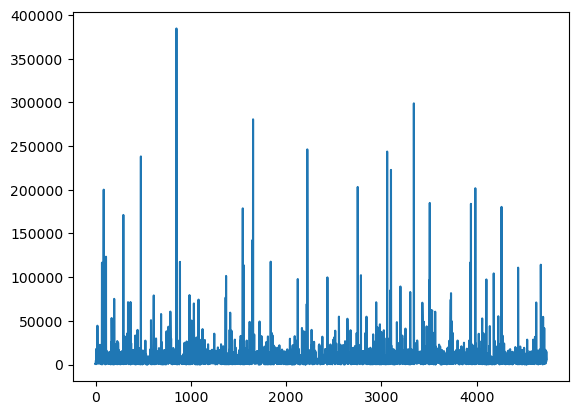

In [29]:
plt.plot(train_df['body_len'])

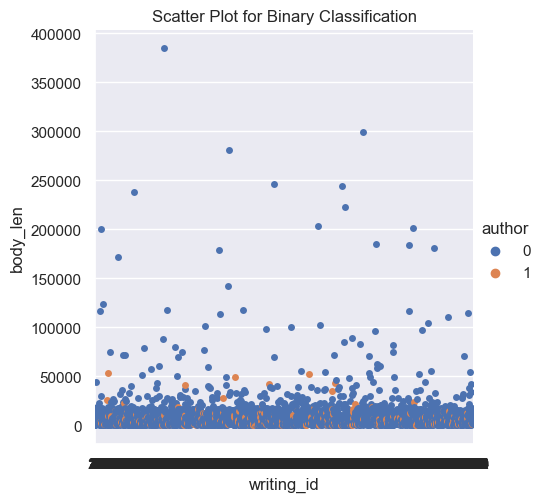

In [33]:
# catplotを使用してクラスごとにグラフを描画
sns.set(style="darkgrid")
g = sns.catplot(data=train_df, x='writing_id', y='body_len', hue='author')

# グラフのタイトルなどを設定
g.set(title='Scatter Plot for Binary Classification')
plt.show()

# 1.簡易モデル作成

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [72]:
# データを読み込み
data = train_df  # データの読み込み方法はデータの形式に応じて変更してください

# 特徴エンジニアリング: TF-IDF特徴量の生成
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X = tfidf_vectorizer.fit_transform(data['body'])

# ターゲット変数の作成
y = data['author']

# データをトレーニングセットとテストセットに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ロジスティック回帰モデルをトレーニング
model = LogisticRegression()
model.fit(X_train, y_train)

# モデルの評価
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(report)

Accuracy: 0.9532428355957768
              precision    recall  f1-score   support

           0       0.95      1.00      0.98       616
           1       1.00      0.34      0.51        47

    accuracy                           0.95       663
   macro avg       0.98      0.67      0.74       663
weighted avg       0.96      0.95      0.94       663



# 2.予測

In [74]:
# テストデータの読み込み（データの読み込み方法はデータの形式に合わせて変更してください）
test_data = test_df  # テストデータの読み込み方法

# TF-IDF変換
X_submit = tfidf_vectorizer.transform(test_data['body'])

# 予測
predictions = model.predict(X_submit)

In [77]:
sum(predictions)

44

# 3.提出

In [78]:
sample_sub_df['author'] = predictions

In [79]:
sample_sub_df['author'].sum()

44

In [80]:
sample_sub_df.to_csv('submission_file/tfdf_ver2.csv')